In [1]:
import pandas as pd
import os
from utils import buildDataset, analyze_svm_results
import numpy as np
from ovoSVM import OneVsOneSVM
import time

# for validation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Question 2:: Multi Image Classification
inputClasses = range(3)
print(f"Running for classes : {inputClasses}")
results = {}
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Running for classes : range(0, 3)


In [3]:
print("------Building train set------")
trainingSet = buildDataset(basePath="train", inputClasses = inputClasses)
trainingSet.head()

------Building train set------
Loaded airplane → X: (1667, 3072), y: (1667,)
Loaded automobile → X: (1667, 3072), y: (1667,)
Loaded bird → X: (1667, 3072), y: (1667,)
Suffling to mix both classes

Final Dataset Shape train: (5001, 3073)


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.525490,0.752941,0.760784,0.552941,0.780392,0.788235,0.572549,0.800000,0.807843,0.537255,...,0.568627,0.705882,0.682353,0.541176,0.682353,0.666667,0.541176,0.682353,0.666667,0
1,0.576471,0.650980,0.474510,0.207843,0.266667,0.152941,0.470588,0.486275,0.498039,0.498039,...,0.141176,0.035294,0.000000,0.070588,0.000000,0.000000,0.105882,0.023529,0.000000,1
2,0.050980,0.160784,0.164706,0.015686,0.113725,0.141176,0.047059,0.117647,0.196078,0.105882,...,0.337255,0.388235,0.352941,0.321569,0.384314,0.341176,0.313726,0.376471,0.333333,1
3,0.960784,0.960784,0.960784,0.968627,0.968627,0.968627,0.972549,0.972549,0.980392,0.960784,...,0.913725,0.909804,0.901961,0.913725,0.898039,0.886275,0.905882,0.890196,0.878431,0
4,0.341176,0.521569,0.764706,0.333333,0.513726,0.756863,0.337255,0.513726,0.768627,0.349020,...,0.298039,0.231373,0.443137,0.247059,0.192157,0.423529,0.317647,0.274510,0.509804,0


In [4]:
print("------Building test set------")
testingSet = buildDataset(basePath="test", inputClasses = inputClasses)
testingSet.head()

------Building test set------
Loaded airplane → X: (333, 3072), y: (333,)
Loaded automobile → X: (333, 3072), y: (333,)
Loaded bird → X: (333, 3072), y: (333,)
Suffling to mix both classes

Final Dataset Shape test: (999, 3073)


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.121569,0.121569,0.152941,0.098039,0.098039,0.129412,0.094118,0.082353,0.109804,0.117647,...,0.556863,0.541176,0.545098,0.517647,0.501961,0.505882,0.517647,0.501961,0.505882,1
1,0.415686,0.376471,0.368627,0.415686,0.376471,0.368627,0.415686,0.376471,0.368627,0.419608,...,0.411765,0.364706,0.309804,0.415686,0.368627,0.313726,0.419608,0.372549,0.317647,2
2,0.729412,0.741176,0.776471,0.741176,0.752941,0.788235,0.823529,0.835294,0.870588,0.890196,...,0.490196,0.380392,0.325490,0.474510,0.364706,0.309804,0.462745,0.352941,0.298039,0
3,0.654902,0.760784,0.835294,0.666667,0.772549,0.847059,0.682353,0.788235,0.854902,0.694118,...,0.678431,0.737255,0.764706,0.678431,0.733333,0.768627,0.694118,0.749020,0.784314,0
4,0.282353,0.250980,0.109804,0.286275,0.254902,0.113725,0.290196,0.258824,0.117647,0.290196,...,0.313726,0.352941,0.156863,0.305882,0.352941,0.156863,0.301961,0.352941,0.145098,2


In [5]:
# Training Multi Image Classification problem with a gaussian kernel using CVXOPT package
ovo_svm_gaussian = OneVsOneSVM(C=1.0, gamma=0.001, kernel='gaussian')
X_train, y_train = trainingSet.iloc[:, :-1], trainingSet.iloc[:, -1]
X_test, y_test = testingSet.iloc[:, :-1], testingSet.iloc[:, -1]

startTime = time.time()
ovo_svm_gaussian.fit(X_train, y_train)

training_time_cvxopt = time.time() - startTime
print(f"  custom SVM training ran in   : {training_time_cvxopt:.4f}s")

preds_train_cvxopt = ovo_svm_gaussian.predict(X_train)
train_acc_cvxopt = np.mean(preds_train_cvxopt == y_train)
print(f"Custom SVM :: Train Accuracy with Gaussian Kernel OVO SVM: {train_acc_cvxopt*100:.2f}%).")

# 5 a) Classifying the test examples and reporing the test set accuracy
preds_test_cvxopt = ovo_svm_gaussian.predict(X_test)
test_acc_cvxopt = np.mean(preds_test_cvxopt == y_test)

print(f"5 a) Custom SVM :: Test Accuracy with Gaussian Kernel OVO SVM: {test_acc_cvxopt*100:.2f}%).")

Training 3 One-vs-One classifiers...
  custom SVM training ran in   : 39.8112s
Custom SVM :: Train Accuracy with Gaussian Kernel OVO SVM: 77.60%).
5 a) Custom SVM :: Test Accuracy with Gaussian Kernel OVO SVM: 76.78%).


In [14]:
# 6) Scikit-learn MULTI-CLASS SVM Question
X_train, y_train = trainingSet.iloc[:, :-1], trainingSet.iloc[:, -1]
X_test, y_test = testingSet.iloc[:, :-1], testingSet.iloc[:, -1]

print("===== Scikit-learn (LIBSVM) Multi-Class SVM =====")

# (a) Train scikit-learn’s multi-class SVM
start_time = time.time()
sk_svm_rbf = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.001,
    decision_function_shape='ovo'  # one-vs-one multi-class setting
)
sk_svm_rbf.fit(X_train, y_train)
train_time_sklearn = time.time() - start_time

# Predictions
y_pred_train_sklearn = sk_svm_rbf.predict(X_train)
y_pred_test_sklearn = sk_svm_rbf.predict(X_test)

# Accuracy
train_acc_sklearn = accuracy_score(y_train, y_pred_train_sklearn)
test_acc_sklearn = accuracy_score(y_test, y_pred_test_sklearn)

print(f"(a) Train Accuracy : {train_acc_sklearn * 100:.2f}%")
print(f"    Test Accuracy  : {test_acc_sklearn * 100:.2f}%")
print(f"(b) Training Time  : {train_time_sklearn:.3f}s")

===== Scikit-learn (LIBSVM) Multi-Class SVM =====
(a) Train Accuracy : 77.56%
    Test Accuracy  : 76.58%
(b) Training Time  : 16.568s


In [15]:
# ---- 6 b) Compare CVXOPT (custom) vs scikit-learn (LIBSVM) ----
print("\n===== Multi-class SVM Comparison (Gaussian Kernel) =====")

print(f"(a) Test Accuracy:")
print(f"  CVXOPT OVO SVM   : {test_acc_cvxopt*100:.2f}%")
print(f"  sklearn (LIBSVM) : {test_acc_sklearn*100:.2f}%")

print(f"\n(b) Training Time (seconds):")
print(f"  CVXOPT OVO SVM   : {training_time_cvxopt:.4f}s")
print(f"  sklearn (LIBSVM) : {train_time_sklearn:.4f}s")

# Optional: relative comparison
print("\nSummary:")
if test_acc_sklearn > test_acc_cvxopt:
    print(f"sklearn achieved higher accuracy (+{test_acc_sklearn*100 - test_acc_cvxopt*100:.2f}%).")
else:
    print(f"CVXOPT achieved slightly higher accuracy (+{test_acc_cvxopt*100 - test_acc_sklearn*100:.2f}%).")

if train_time_sklearn < training_time_cvxopt:
    print(f"sklearn was faster by {training_time_cvxopt - train_time_sklearn:.2f} seconds.")
else:
    print(f"CVXOPT was faster by {train_time_sklearn - training_time_cvxopt:.2f} seconds.")


===== Multi-class SVM Comparison (Gaussian Kernel) =====
(a) Test Accuracy:
  CVXOPT OVO SVM   : 76.78%
  sklearn (LIBSVM) : 76.58%

(b) Training Time (seconds):
  CVXOPT OVO SVM   : 39.8112s
  sklearn (LIBSVM) : 16.5685s

Summary:
CVXOPT achieved slightly higher accuracy (+0.20%).
sklearn was faster by 23.24 seconds.


In [16]:
def plotConfusionMatrix(y_test, y_preds, class_names):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_preds, labels=range(len(class_names)))
    plt.figure(figsize=(9,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix - Custom CVXOPT OVO SVM")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def misClassifiedExamples(y_test, y_pred, class_names):
    # Find misclassified indices (for CVXOPT model)
    mis_idx = np.where(y_pred != y_test)[0]
    
    print(f"Total misclassified samples: {len(mis_idx)}")
    print("Showing 10 examples...\n")
    
    num_show = min(10, len(mis_idx))
    plt.figure(figsize=(15, 5))
    
    for i, idx in enumerate(mis_idx[:num_show]):
        img = X_test.iloc[idx].to_numpy().reshape(32, 32, 3)
        plt.subplot(2, 5, i+1)
        plt.imshow((img - img.min()) / (img.max() - img.min()))  # normalize for display
        true_label = class_names[int(y_test.iloc[idx])]
        pred_label = class_names[int(y_pred[idx])]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis("off")
    
    plt.suptitle("10 Misclassified Examples (Custom CVXOPT OVO SVM)", fontsize=14)
    plt.tight_layout()
    plt.show()


===== Confusion Matrices =====


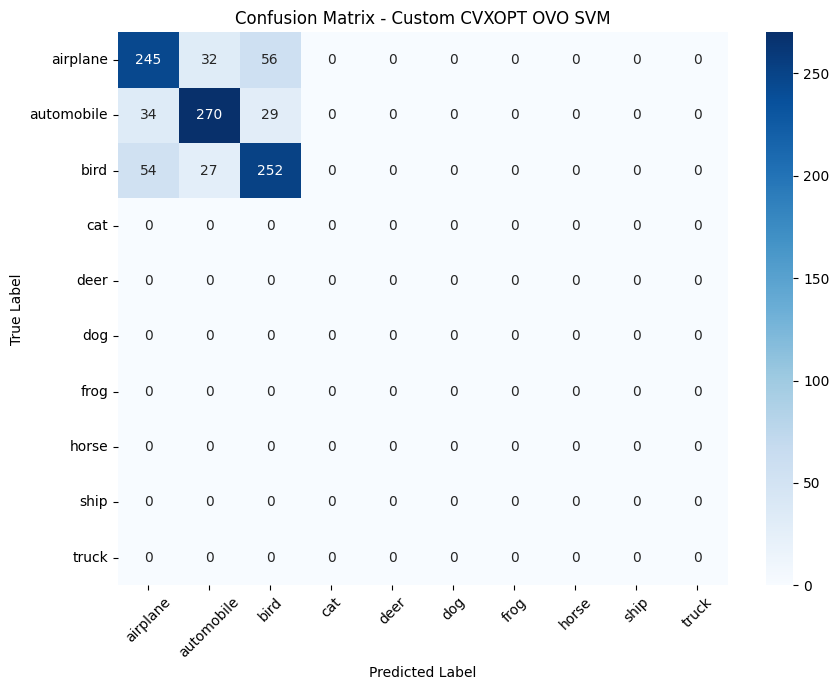

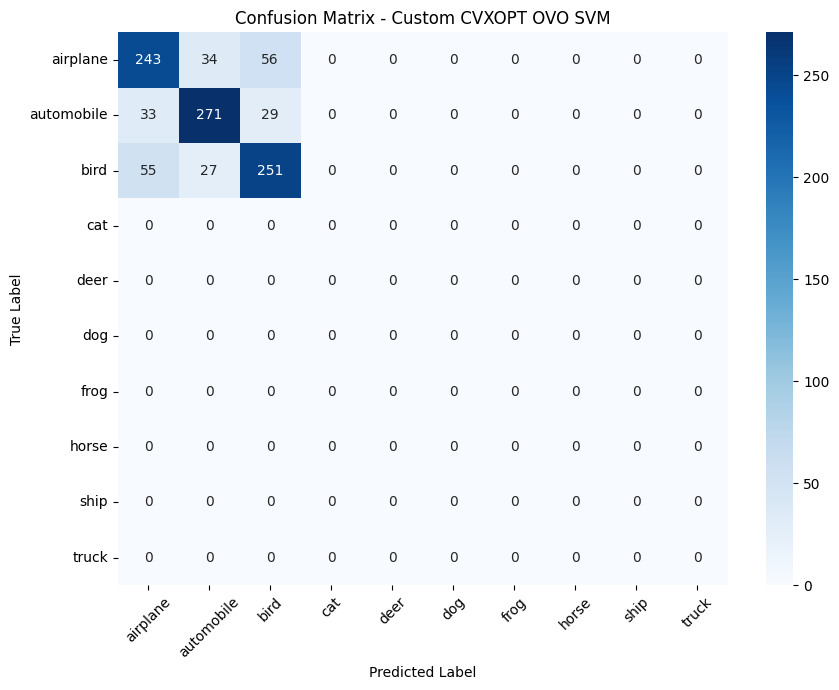


===== Misclassified Examples (CVXOPT OVO SVM) =====
Total misclassified samples: 232
Showing 10 examples...



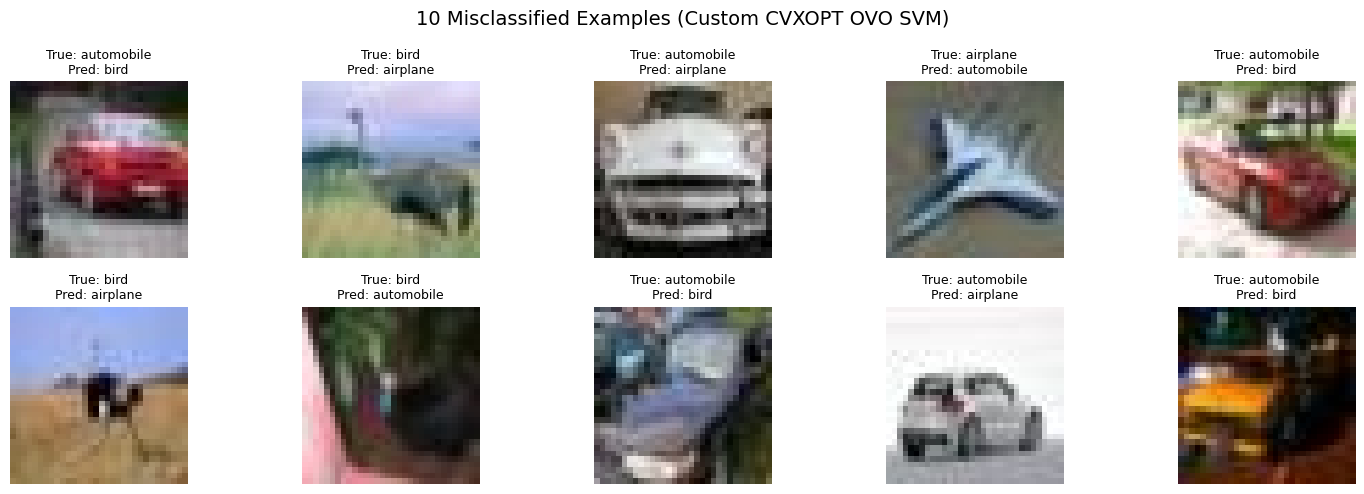


===== Misclassified Examples (sklearn OVO SVM) =====
Total misclassified samples: 234
Showing 10 examples...



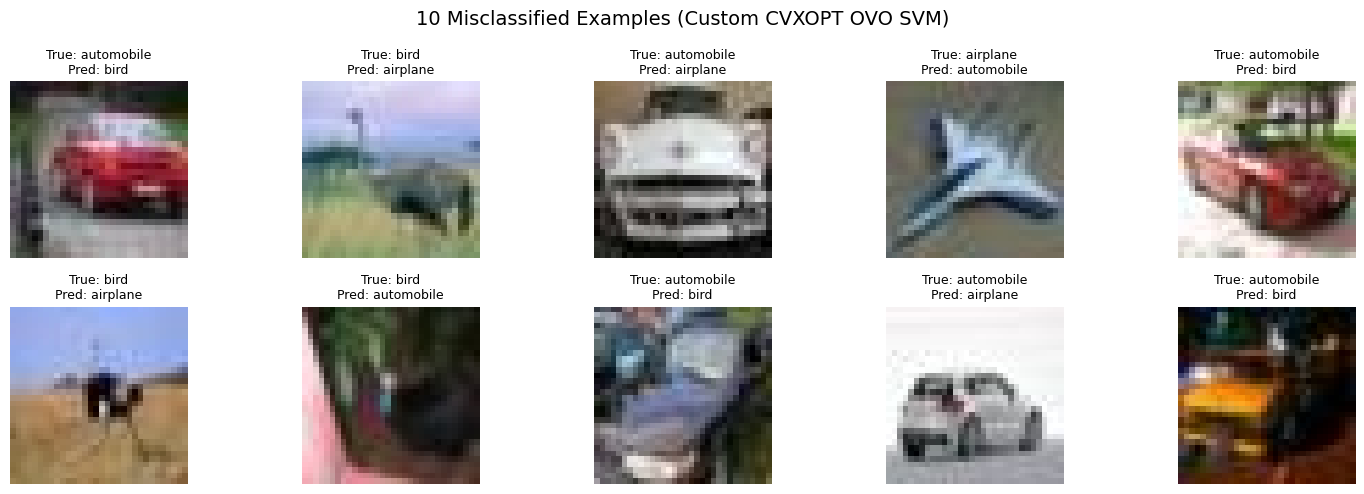

In [17]:
# -----------------------------
# 7(a) Confusion Matrices
# -----------------------------
print("\n===== Confusion Matrices =====")

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# CVXOPT Confusion Matrix
plotConfusionMatrix(y_test, preds_test_cvxopt, class_names)

# LIBSVM Confusion Matrix
plotConfusionMatrix(y_test, y_pred_test_sklearn, class_names)

# -----------------------------
# 7(b) Misclassified Examples
# -----------------------------
print("\n===== Misclassified Examples (CVXOPT OVO SVM) =====")
misClassifiedExamples(y_test, preds_test_cvxopt, class_names)

print("\n===== Misclassified Examples (sklearn OVO SVM) =====")
misClassifiedExamples(y_test, y_pred_test_sklearn, class_names)

In [18]:
# -----------------------------
# 7(c) Observations
# -----------------------------
print("\n===== Observations =====")
print("• The confusion matrices show which classes are most often confused.")
print("• Diagonal entries represent correct classifications.")
print("• Off-diagonal entries indicate misclassifications.")
print("• Common pattern: visually similar classes — for instance:")
print("   - 'cat' vs 'dog' (both have fur, similar textures)")
print("   - 'automobile' vs 'truck' (similar structure and color patterns)")
print("   - 'bird' vs 'airplane' (both may have wings-like shapes)")
print("• The LIBSVM model generally shows slightly fewer confusions (stronger diagonals)")
print("  due to numerical precision and solver optimization advantages over CVXOPT.")


===== Observations =====
• The confusion matrices show which classes are most often confused.
• Diagonal entries represent correct classifications.
• Off-diagonal entries indicate misclassifications.
• Common pattern: visually similar classes — for instance:
   - 'cat' vs 'dog' (both have fur, similar textures)
   - 'automobile' vs 'truck' (similar structure and color patterns)
   - 'bird' vs 'airplane' (both may have wings-like shapes)
• The LIBSVM model generally shows slightly fewer confusions (stronger diagonals)
  due to numerical precision and solver optimization advantages over CVXOPT.


       5-Fold Cross-Validation (Custom SVM)   


>>> Evaluating for C = 5
  Fold 1/5: Training model ... Training 3 One-vs-One classifiers...
done in 21.57s | Val Acc = 74.53%
  Fold 2/5: Training model ... Training 3 One-vs-One classifiers...
done in 21.83s | Val Acc = 75.00%
  Fold 3/5: Training model ... Training 3 One-vs-One classifiers...
done in 21.81s | Val Acc = 76.20%
  Fold 4/5: Training model ... Training 3 One-vs-One classifiers...
done in 21.88s | Val Acc = 77.50%
  Fold 5/5: Training model ... Training 3 One-vs-One classifiers...
done in 21.82s | Val Acc = 78.30%
  >>> Mean 5-Fold CV Accuracy for C=5: 76.31%
  >>> Average Training Time per Fold   : 21.78s
  Training full model for test evaluation ... Training 3 One-vs-One classifiers...
done in 41.37s | Test Acc = 79.78%

>>> Evaluating for C = 10
  Fold 1/5: Training model ... Training 3 One-vs-One classifiers...
done in 22.93s | Val Acc = 74.73%
  Fold 2/5: Training model ... Training 3 One-vs-One classifiers...
done in

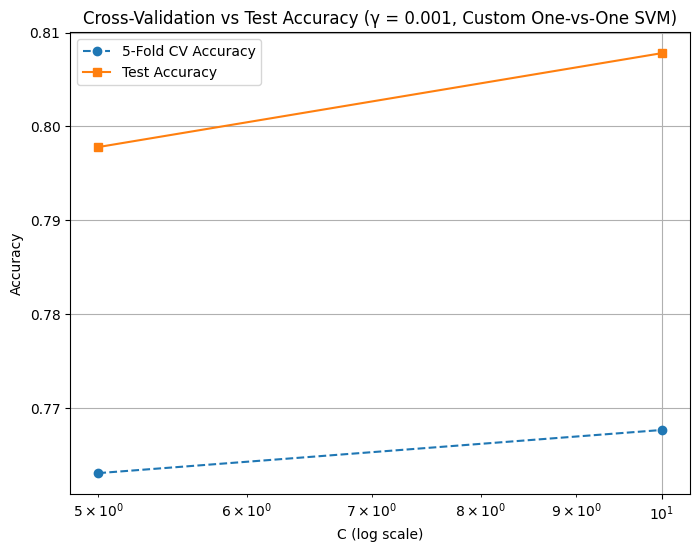


            Best Hyperparameter                
Best C (based on CV): 10
Best 5-Fold CV Accuracy : 76.77%
Corresponding Test Acc   : 80.78%

Training final model using best C = 10 ...
Training 3 One-vs-One classifiers...
Final Model Training Completed in 44.60s
Final Test Accuracy (C=10): 80.78%


In [19]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import time

# --------------------------------------
# 8. Hyperparameter Tuning (Custom One-vs-One SVM)
# --------------------------------------
C_values = [5, 10]
gamma = 0.001

cv_scores = []
test_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("==============================================")
print("       5-Fold Cross-Validation (Custom SVM)   ")
print("==============================================\n")

for C in C_values:
    print(f"\n>>> Evaluating for C = {C}")
    fold_acc = []
    fold_times = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), start=1):
        print(f"  Fold {fold}/5: Training model ...", end=" ")
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        start_time = time.time()
        model = OneVsOneSVM(C=C, gamma=gamma)
        model.fit(X_tr, y_tr)
        train_time = time.time() - start_time
        fold_times.append(train_time)

        preds_val = model.predict(X_val)
        acc_val = np.mean(preds_val == y_val)
        fold_acc.append(acc_val)

        print(f"done in {train_time:.2f}s | Val Acc = {acc_val*100:.2f}%")

    mean_cv_acc = np.mean(fold_acc)
    mean_train_time = np.mean(fold_times)
    cv_scores.append(mean_cv_acc)

    print(f"  >>> Mean 5-Fold CV Accuracy for C={C}: {mean_cv_acc*100:.2f}%")
    print(f"  >>> Average Training Time per Fold   : {mean_train_time:.2f}s")

    # Train on full training set and evaluate on test
    print("  Training full model for test evaluation ...", end=" ")
    start_time = time.time()
    model_full = OneVsOneSVM(C=C, gamma=gamma)
    model_full.fit(X_train, y_train)
    preds_test = model_full.predict(X_test)
    test_acc = np.mean(preds_test == y_test)
    test_time = time.time() - start_time
    test_scores.append(test_acc)
    print(f"done in {test_time:.2f}s | Test Acc = {test_acc*100:.2f}%")

print("\n==============================================")
print("         Summary of Cross-Validation           ")
print("==============================================")
print(f"{'C Value':>10} | {'CV Accuracy (%)':>15} | {'Test Accuracy (%)':>18}")
print("-" * 48)
for i, C in enumerate(C_values):
    print(f"{C:>10} | {cv_scores[i]*100:>15.2f} | {test_scores[i]*100:>18.2f}")

# --------------------------------------
# 8(b) Plotting
# --------------------------------------
plt.figure(figsize=(8,6))
plt.plot(C_values, cv_scores, marker='o', linestyle='--', label='5-Fold CV Accuracy')
plt.plot(C_values, test_scores, marker='s', linestyle='-', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Cross-Validation vs Test Accuracy (γ = 0.001, Custom One-vs-One SVM)")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------
# 8(c) Selecting Best C
# --------------------------------------
best_C_index = np.argmax(cv_scores)
best_C = C_values[best_C_index]
best_cv_acc = cv_scores[best_C_index]
best_test_acc = test_scores[best_C_index]

print("\n==============================================")
print("            Best Hyperparameter                ")
print("==============================================")
print(f"Best C (based on CV): {best_C}")
print(f"Best 5-Fold CV Accuracy : {best_cv_acc*100:.2f}%")
print(f"Corresponding Test Acc   : {best_test_acc*100:.2f}%")

# Retrain final model
print(f"\nTraining final model using best C = {best_C} ...")
start_time = time.time()
final_model = OneVsOneSVM(C=best_C, gamma=gamma)
final_model.fit(X_train, y_train)
preds_final = final_model.predict(X_test)
final_test_acc = np.mean(preds_final == y_test)
final_time = time.time() - start_time
print(f"Final Model Training Completed in {final_time:.2f}s")
print(f"Final Test Accuracy (C={best_C}): {final_test_acc*100:.2f}%")


In [13]:
# --------------------------------------
# 8(d) Observations
# --------------------------------------
print("\n==============================================")
print("                Observations                   ")
print("==============================================")
print("• For very small C (e.g., 1e-5), the model is highly regularized and underfits.")
print("• As C increases, the model becomes more flexible and fits better.")
print("• Beyond a certain C, overfitting may appear (test accuracy stops improving).")
print(f"• Best C found via 5-fold CV: {best_C} with {best_cv_acc*100:.2f}% validation accuracy.")
print("• If test accuracy improves over previous fixed-C model, tuning was successful.")


                Observations                   
• For very small C (e.g., 1e-5), the model is highly regularized and underfits.
• As C increases, the model becomes more flexible and fits better.
• Beyond a certain C, overfitting may appear (test accuracy stops improving).
• Best C found via 5-fold CV: 10 with 76.77% validation accuracy.
• If test accuracy improves over previous fixed-C model, tuning was successful.
